---
title: "Evaluating Twitter With Plumes"
subtitle: ""
summary: ""
authors: []
tags: []
categories: []
date: 2020-08-22T08:12:12-04:00
lastmod: 2020-08-22T08:12:12-04:00
featured: false
draft: false

image:
  caption: ""
  focal_point: ""
  preview_only: false
---


In [23]:
import json
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib as mpl

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

## Analyzing Tweets

In [8]:
path = Path("EngNadeau-tweets.json")
with open(path) as f:
    data = json.load(f)

In [32]:
df = pd.json_normalize(data).pipe(
    lambda x: x.assign(**{"created_at": pd.to_datetime(x["created_at"])})
)

In [33]:
df.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,retweeted_status.quoted_status.place.contained_within,retweeted_status.quoted_status.place.bounding_box.type,retweeted_status.quoted_status.place.bounding_box.coordinates,retweeted_status.quoted_status.entities.media,retweeted_status.quoted_status.extended_entities.media,retweeted_status.scopes.followers,retweeted_status.geo.type,retweeted_status.geo.coordinates,retweeted_status.coordinates.type,retweeted_status.coordinates.coordinates
0,2020-08-20 17:50:52+00:00,1296504993260896258,1296504993260896258,Shoutout to @thedungeoncast for their breaks’ ...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-18 14:59:41+00:00,1295737134972903425,1295737134972903425,My personal shoutout = eReader + @LibbyApp + @...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-18 03:00:46+00:00,1295556215351717888,1295556215351717888,Accidentally published their private keys http...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-17 19:52:11+00:00,1295448359004786694,1295448359004786694,This may be one of my favourite #bot features:...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.295448e+18,1295448001100623875,81023088.0,81023088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-17 19:50:46+00:00,1295448001100623875,1295448001100623875,Pybotics -&gt; https://t.co/4YRC6gqOxf\nsemant...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.295448e+18,1295447755469594624,81023088.0,81023088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


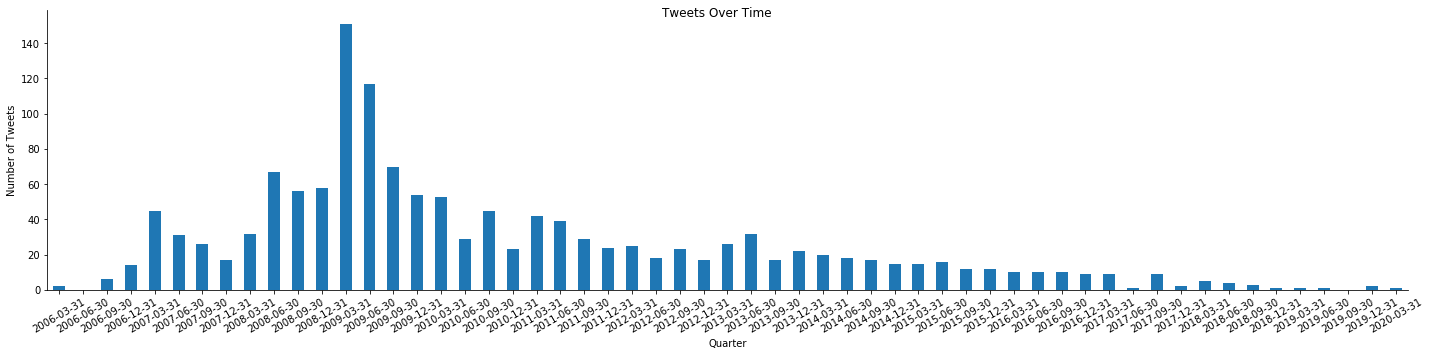

In [83]:
fig, ax = plt.subplots(figsize=(20, 5))

(
    df.set_index("created_at")
    .resample("Q")
    .count()
    .pipe(lambda x: x.set_index(x.index.date))
    .pipe(lambda x: x["id"])
    .plot.bar(ax=ax, rot=30)
)

fig.suptitle("Tweets Over Time")
ax.set_xlabel("Quarter")
ax.set_ylabel("Number of Tweets")
fig.tight_layout()

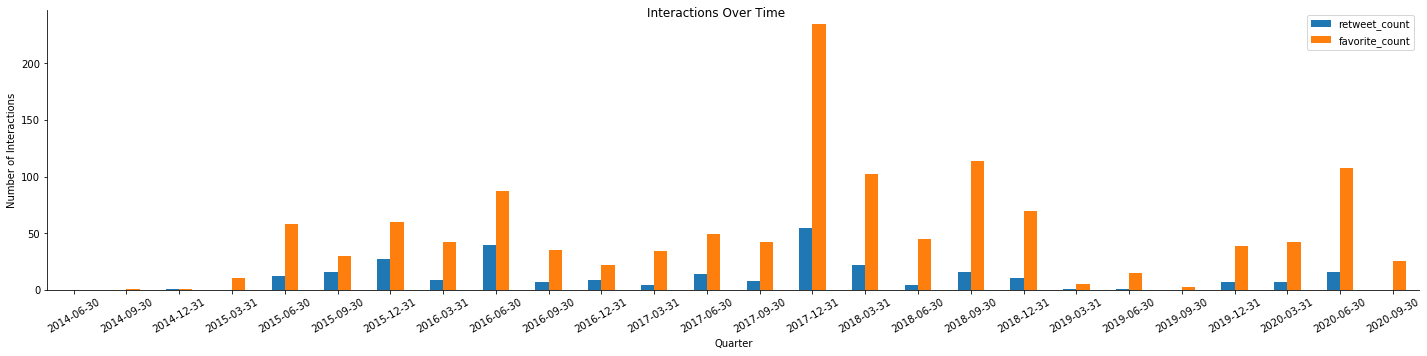

In [79]:
fig, ax = plt.subplots(figsize=(20, 5))

(
    df.set_index("created_at")
    .pipe(lambda x: x[x["retweeted_status.id"].isna()])
    .resample("Q")
    .sum()
    .pipe(lambda x: x.set_index(x.index.date))
    .pipe(lambda x: x[["retweet_count", "favorite_count"]])
    .plot.bar(ax=ax, rot=30)
)

fig.suptitle("Interactions Over Time")
ax.set_xlabel("Quarter")
ax.set_ylabel("Number of Interactions")
ax.legend()
fig.tight_layout()

## Analyzing Friends

In [80]:
path = Path("EngNadeau-friends.json")
with open(path) as f:
    data = json.load(f)

In [81]:
df = pd.json_normalize(data).pipe(
    lambda x: x.assign(**{"created_at": pd.to_datetime(x["created_at"])})
)

In [82]:
df.head()

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,...,status.retweeted_status.place.id,status.retweeted_status.place.url,status.retweeted_status.place.place_type,status.retweeted_status.place.name,status.retweeted_status.place.full_name,status.retweeted_status.place.country_code,status.retweeted_status.place.country,status.retweeted_status.place.contained_within,status.retweeted_status.place.bounding_box.type,status.retweeted_status.place.bounding_box.coordinates
0,86315276,86315276,Will Strafach,chronic,"San Francisco, CA",building great things. breaking others. | foun...,https://t.co/7qRzHeZcxy,False,60239,5265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15752235,15752235,Zack Whittaker,zackwhittaker,"New York, NY",Security editor @TechCrunch • Signal / WhatsAp...,https://t.co/0I0oRqFMAy,False,59392,998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,776454093816594433,776454093816594433,Oliver Limoyo,OliverLimoyo,,PhD. candidate @UofTRobotics @VectorInst study...,https://t.co/I8kDSFF4Jp,False,71,306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1079370278424272898,1079370278424272898,AppsCyborg,AppsCyborg,World,Home of all cyborg web apps. All our apps are ...,https://t.co/djpFssnWsi,False,825,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19510090,19510090,Julian Togelius,togelius,New York City,AI and games researcher.\nAssociate professor ...,http://t.co/j74XjVzSps,False,10675,983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df[
    [
        "followers_count",
        "friends_count",
        "listed_count",
        "favourites_count",
        "verified",
        "statuses_count",
    ]
].describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count
count,1.413000e+03,1413.000000,1413.000000,1.413000e+03,1413.000000
mean,1.261409e+06,1898.796178,6021.755131,1.170129e+04,28546.385704
std,5.785622e+06,16325.569105,16785.863452,4.135320e+04,62321.846857
min,7.100000e+01,0.000000,0.000000,0.000000e+00,6.000000
25%,9.213000e+03,240.000000,233.000000,7.040000e+02,2970.000000
50%,4.812800e+04,630.000000,910.000000,3.045000e+03,8630.000000
75%,3.439110e+05,1412.000000,4251.000000,9.261000e+03,23789.000000
max,1.217537e+08,602053.000000,221282.000000,1.034884e+06,654080.000000


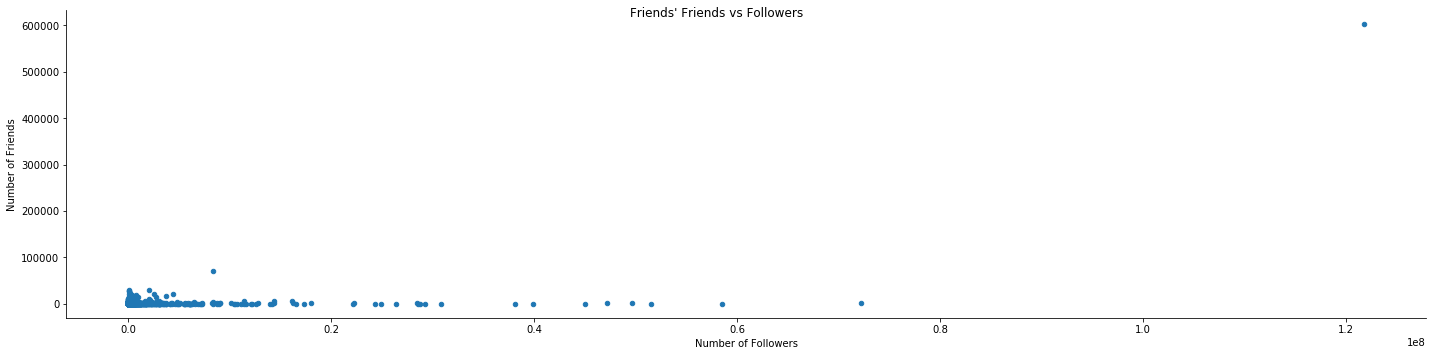

In [100]:
fig, ax = plt.subplots(figsize=(20, 5))

(df.plot.scatter(x="followers_count", y="friends_count", ax=ax))

fig.suptitle("Friends' Friends vs Followers")
ax.set_xlabel("Number of Followers")
ax.set_ylabel("Number of Friends")
fig.tight_layout()

In [105]:
df.iloc[df["friends_count"].idxmax()]

id                                                                813286
id_str                                                            813286
name                                                        Barack Obama
screen_name                                                  BarackObama
location                                                  Washington, DC
                                                               ...      
status.retweeted_status.place.country_code                           NaN
status.retweeted_status.place.country                                NaN
status.retweeted_status.place.contained_within                       NaN
status.retweeted_status.place.bounding_box.type                      NaN
status.retweeted_status.place.bounding_box.coordinates               NaN
Name: 1407, Length: 131, dtype: object

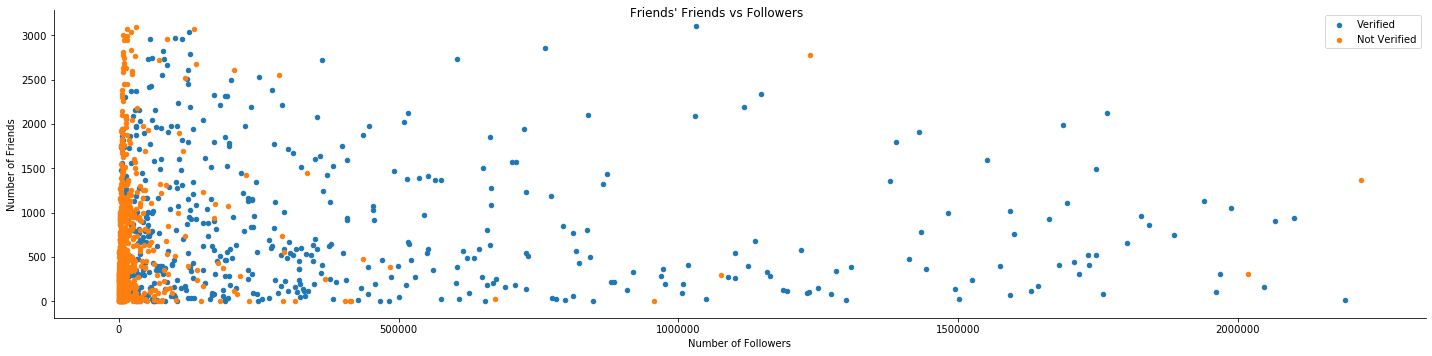

In [145]:
fig, ax = plt.subplots(figsize=(20, 5))

df_plot = df.pipe(
    lambda x: x[x["friends_count"] < x["friends_count"].quantile(q=0.9)]
).pipe(lambda x: x[x["followers_count"] < x["followers_count"].quantile(q=0.9)])

df_plot.pipe(lambda x: x[x["verified"]]).plot.scatter(
    x="followers_count", y="friends_count", ax=ax, label="Verified", c="C0"
)

df_plot.pipe(lambda x: x[~x["verified"]]).plot.scatter(
    x="followers_count", y="friends_count", ax=ax, label="Not Verified", c="C1"
)

fig.suptitle("Friends' Friends vs Followers")
ax.set_xlabel("Number of Followers")
ax.set_ylabel("Number of Friends")
ax.legend()
fig.tight_layout()

## Analyzing Followers

In [148]:
path = Path("EngNadeau-followers.json")
with open(path) as f:
    data = json.load(f)
    
df = pd.json_normalize(data)
df.head()

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,...,status.place.country_code,status.place.country,status.place.contained_within,status.place.bounding_box.type,status.place.bounding_box.coordinates,status.retweeted_status.scopes.followers,status.geo.type,status.geo.coordinates,status.coordinates.type,status.coordinates.coordinates
0,951239408488914947,951239408488914947,Jude Atwood,OrigamiDad,,An eldritch machine that converts groceries in...,https://t.co/DRLY34A9hG,False,15349,16308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65625348,65625348,TelemetryTV,TelemetryTV,"Vancouver, Canada",A simple and intuitive digital signage platfor...,https://t.co/ywbtkouyVF,False,1459,4526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1293246437145243649,1293246437145243649,Christina B. Espana,b_espana,USA,Hi.I am #Graphic #Designer.I provide custom #L...,https://t.co/71YYytOzUx,False,62,416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16529873,16529873,Jesse Torres,jstorres,"Manhattan Beach, CA",Husband - Dad - Author - Community Banker - ht...,https://t.co/vMkhENkMPA,False,433301,16249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3827309952,3827309952,Haitham El-Hussieny,elhussieny_h,"Manchester, England",Senior Research Fellow in Soft Robotics at The...,https://t.co/JWBIcgNf6R,False,131,496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
df[
    [
        "followers_count",
        "friends_count",
        "listed_count",
        "favourites_count",
        "statuses_count",
    ]
].describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count
count,415.000000,415.000000,415.000000,415.000000,415.000000
mean,11384.383133,7517.995181,216.440964,8437.607229,8067.486747
std,49900.883039,28192.646597,825.984159,31234.608874,31261.202148
min,0.000000,2.000000,0.000000,0.000000,0.000000
25%,170.500000,583.000000,1.000000,61.500000,114.500000
50%,740.000000,1560.000000,15.000000,754.000000,883.000000
75%,3240.000000,4134.000000,83.500000,3707.000000,4229.500000
max,697213.000000,422464.000000,10053.000000,376809.000000,478403.000000


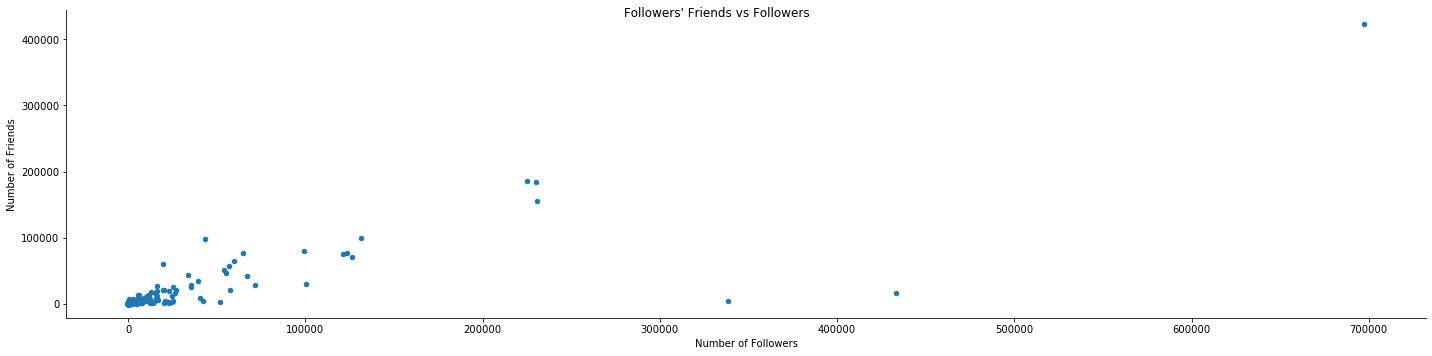

In [151]:
fig, ax = plt.subplots(figsize=(20, 5))

(df.plot.scatter(x="followers_count", y="friends_count", ax=ax))

fig.suptitle("Followers' Friends vs Followers")
ax.set_xlabel("Number of Followers")
ax.set_ylabel("Number of Friends")
fig.tight_layout()

In [152]:
df.iloc[df["friends_count"].idxmax()]

id                                                 54938044
id_str                                             54938044
name                                         Brian D. Evans
screen_name                                     BrianDEvans
location                                    Los Angeles, CA
                                                 ...       
status.retweeted_status.scopes.followers                NaN
status.geo.type                                         NaN
status.geo.coordinates                                  NaN
status.coordinates.type                                 NaN
status.coordinates.coordinates                          NaN
Name: 162, Length: 132, dtype: object

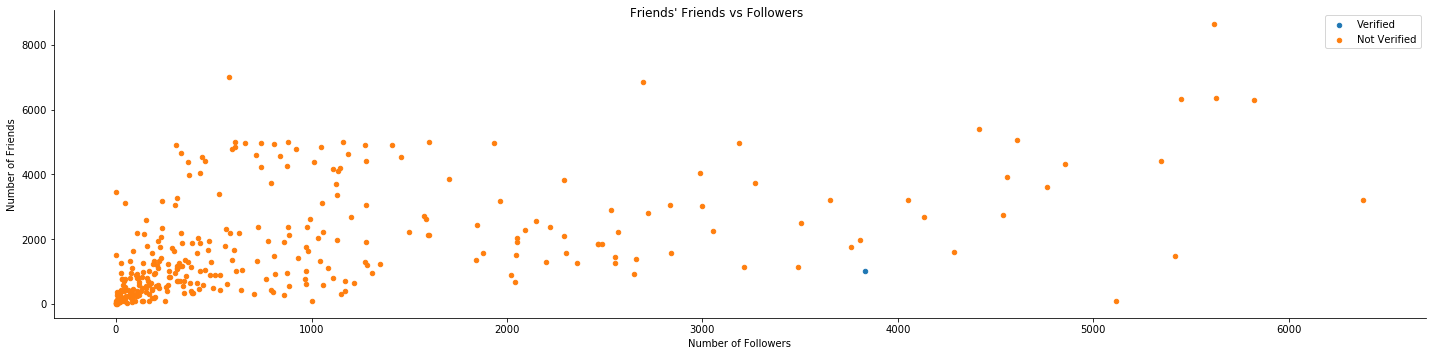

In [153]:
fig, ax = plt.subplots(figsize=(20, 5))

df_plot = df.pipe(
    lambda x: x[x["friends_count"] < x["friends_count"].quantile(q=0.9)]
).pipe(lambda x: x[x["followers_count"] < x["followers_count"].quantile(q=0.9)])

df_plot.pipe(lambda x: x[x["verified"]]).plot.scatter(
    x="followers_count", y="friends_count", ax=ax, label="Verified", c="C0"
)

df_plot.pipe(lambda x: x[~x["verified"]]).plot.scatter(
    x="followers_count", y="friends_count", ax=ax, label="Not Verified", c="C1"
)

fig.suptitle("Friends' Friends vs Followers")
ax.set_xlabel("Number of Followers")
ax.set_ylabel("Number of Friends")
ax.legend()
fig.tight_layout()